# Analyze data-Obesity

In [ ]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import sys, sklearn, scipy, matplotlib

sys.setrecursionlimit(10000)

from scipy import stats
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression, Ridge, Lasso,  RidgeCV 
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

path = '/Volumes/ext200/Dropbox/metis/pklfiles/'

In [2]:
# set style to ggplot
plt.style.use('ggplot')

In [3]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


In [4]:
with open(path + "fdf.pkl", 'rb') as picklefile: 
    fdf = pickle.load(picklefile)

In [5]:
def plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=0,title="Checking Train-Test Split"):
    x_plot = []
    x_plot_test = []
    for j in X_train:
        x_plot.append(j[feature_num])
    for j in X_test:
        x_plot_test.append(j[feature_num])

    #plt.figure(figsize=(8,6))
    plt.scatter(x_plot, y_train, c='b')
    plt.scatter(x_plot_test, y_test, c='r')
    plt.xlabel("Feature " + str(feature_num),fontsize=16)
    plt.ylabel("% Adult Obesity",fontsize=16);
    plt.title(title,fontsize=16);

In [6]:
full_df = fdf.loc[:,('Adult obesity Value','locations','Severe housing problems Value','Food environment index Value','Some college Value','Access to exercise opportunities Value')]

#look at correlations among variables, first
full_df.corr()

,Adult obesity Value,locations,Severe housing problems Value,Food environment index Value,Some college Value,Access to exercise opportunities Value
Adult obesity Value,1.000000,-0.151445,-0.047366,-0.346304,-0.486020,-0.360477
locations,-0.151445,1.000000,0.252714,0.104523,0.238601,0.389998
Severe housing problems Value,-0.047366,0.252714,1.000000,-0.331870,-0.083738,0.225522
Food environment index Value,-0.346304,0.104523,-0.331870,1.000000,0.358018,0.346971
Some college Value,-0.486020,0.238601,-0.083738,0.358018,1.000000,0.412304
Access to exercise opportunities Value,-0.360477,0.389998,0.225522,0.346971,0.412304,1.000000


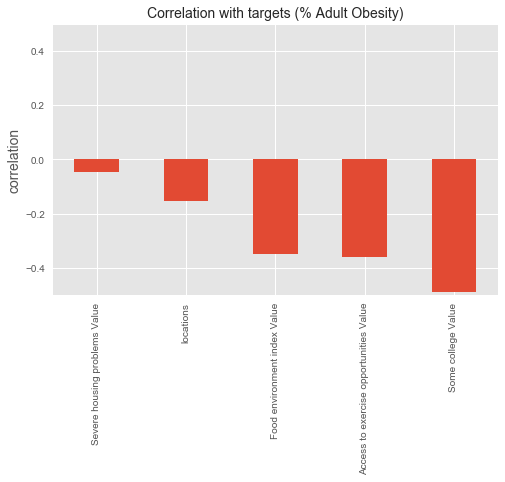

In [7]:
corrOBS = full_df.corr()['Adult obesity Value'].sort_values(ascending=False)

fig10 = plt.figure(figsize=(8,5));
axes = plt.gca()
axes.set_ylim([-.5,.5])
plt.ylabel('correlation',fontsize=14)
plt.title('Correlation with targets (% Adult Obesity)',fontsize=14)
corrOBS[1:].plot(kind='bar', use_index=True);



In [ ]:
full_dff = full_df.dropna(axis=0)

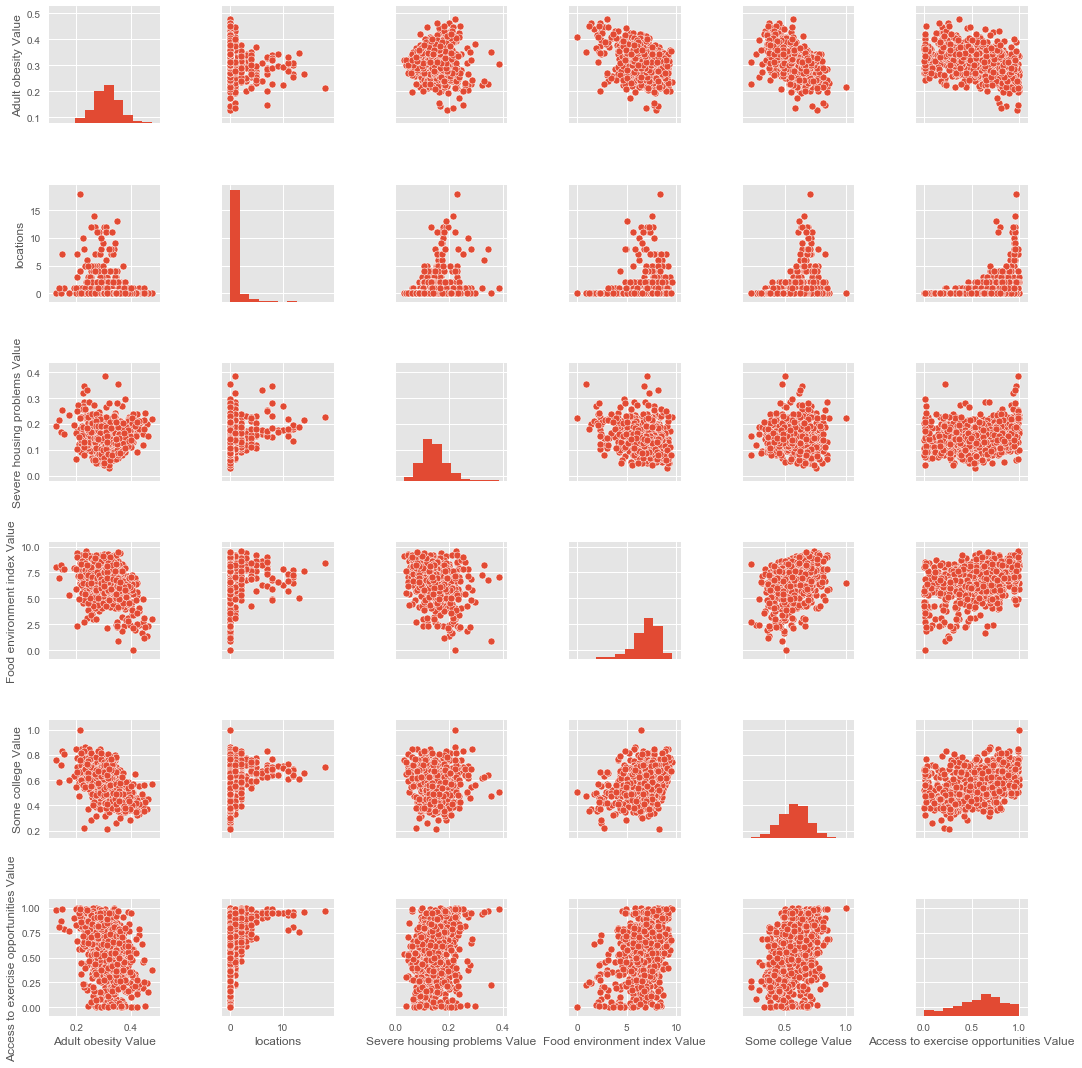

In [24]:
v = sns.pairplot(full_dff)

In [25]:
# features
XX = full_dff.loc[:,('locations','Severe housing problems Value','Food environment index Value',
                     'Some college Value','Access to exercise opportunities Value')]

#targets
y = full_dff['Adult obesity Value']

In [26]:
#need to train-test-split into test (20%) and train groups
X_traina, X_testa, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=52)

In [27]:
#save the test/train sets
with open(path + 'X_train.pkl', 'wb') as picklefile:
        pickle.dump(X_traina, picklefile)    
        
with open(path + 'X_test.pkl', 'wb') as picklefile:
        pickle.dump(X_testa, picklefile)    
        
with open(path + 'y_train.pkl', 'wb') as picklefile:
        pickle.dump(y_train, picklefile)  
        
with open(path + 'y_test.pkl', 'wb') as picklefile:
        pickle.dump(y_test, picklefile)    

In [28]:
X_train1 = np.array(X_traina)
X_test1 = np.array(X_testa)

In [29]:
# STANDARD SCALE  for the val set and train set separately, so you are not peeking at your data. 
stdScale = StandardScaler()

#X_train = X_train1.reshape(-1,1)
X_train = stdScale.fit_transform(X_train1)

In [30]:
stdScale = StandardScaler()

#X_test = X_test1.reshape(-1,1)
X_test = stdScale.fit_transform(X_test1)

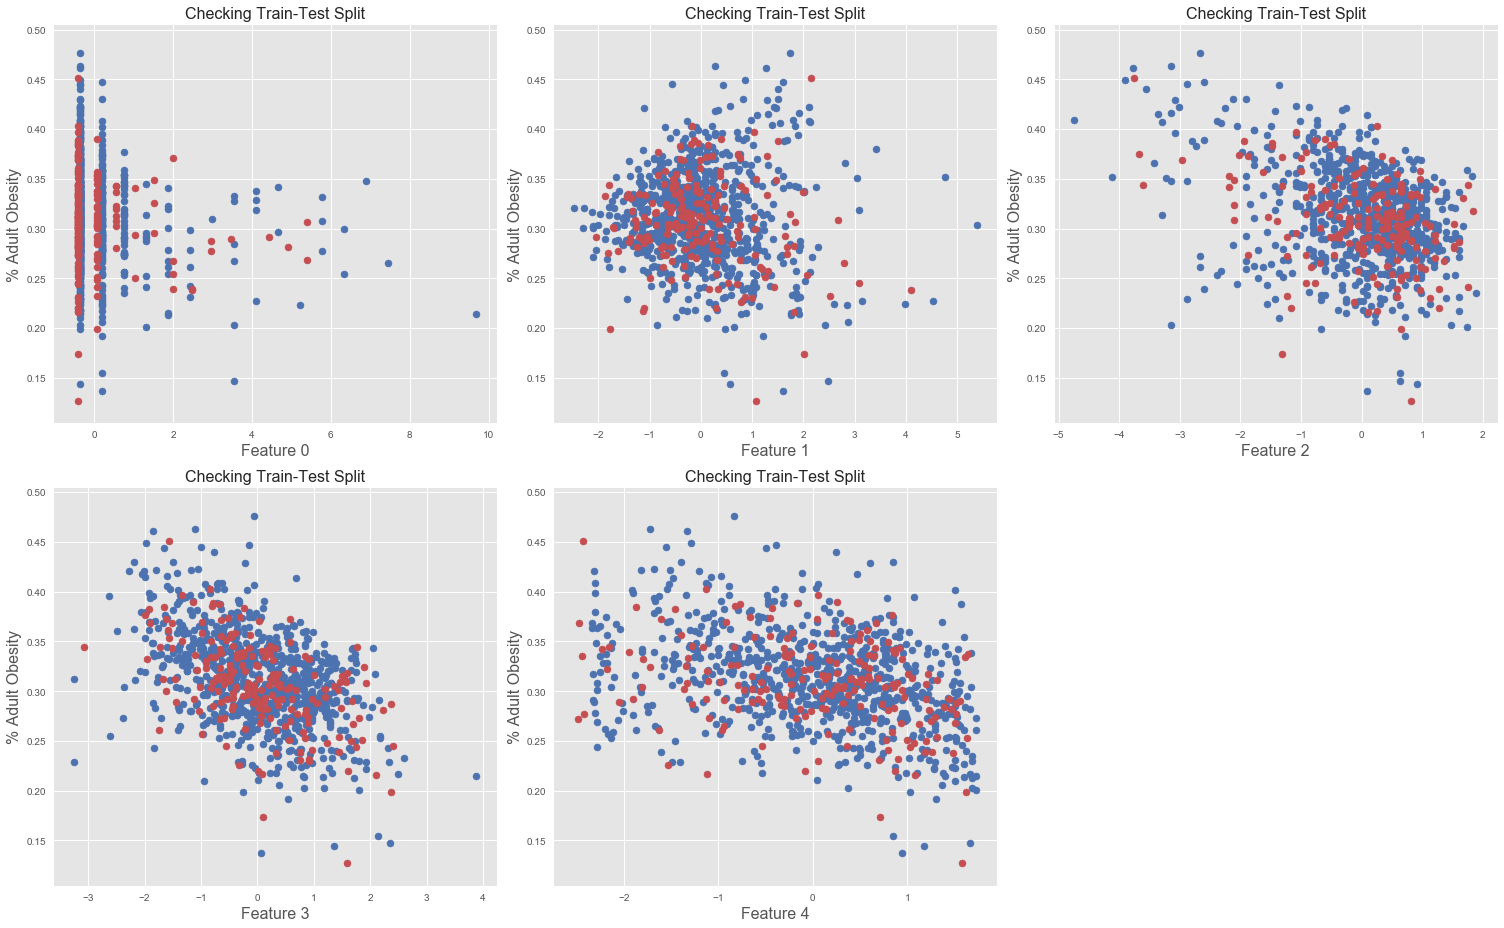

In [32]:
# plot the test-train split by feature vs. targets to get an idea of distribution and check the split was correct

fig0 = plt.figure(figsize=(21,13));

plt.subplot(2,3,1);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=0)

plt.subplot(2,3,2);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=1)

plt.subplot(2,3,3);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=2)

plt.subplot(2,3,4);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=3)

plt.subplot(2,3,5);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=4)

plt.tight_layout()

In [33]:


def one_feature_lr(features, xs, y):
    """ # fit each feature from the training set to the linear model 
    one at a time and plot regress and dist of residuals
    --------------------
    IN: features = number of features
        xs = array of features
        y = target values
        
    OUT: 2 plots per feature    
    """
   
    for feat in range(features):
        
        lr= LinearRegression()
        
        #if only one feature, it needs to be reshaped
        x = xs[:,feat].reshape(-1,1)
        
        #fit linear model
        lr.fit(x,y)
        
        #calculate errors
        MSE = mean_squared_error(y,lr.predict(x))
        
        #calc residuals
        resid = y - lr.predict(x)
        
        # test if residuals are normally distributed (statistically signifigant)
        p=normaltest(resid)
        
        #plot regression line vs actual targets and mean squared error
        fig2 = plt.figure()
        plt.plot(x, y,'ro', label = 'actual')
        plt.plot(x,lr.predict(x),'k', label='predicted')
        
        plt.title('Training linear regression with one feature',fontsize=14)
        plt.xlabel("Feature " + str(feat),fontsize=16)
        plt.ylabel('% Adult Obesity',fontsize=14)
        plt.grid();
        plt.legend();
        fig2.text(0.66, .70, 'MSErr = {:2f}'.format(MSE), fontsize=12);
       
       
        #plot distribution of redisuals & p-value
        fig1 = plt.figure()
        plt.hist(resid);
        plt.title('Distribution of residuals \n linear regression with 1 Feature',fontsize=14);
        plt.ylabel('number of observations',fontsize=14);
        plt.grid();
        fig1.text(0.68, .8, 'p = {:2f}'.format(p[1]), fontsize=12);
        plt.tight_layout()     

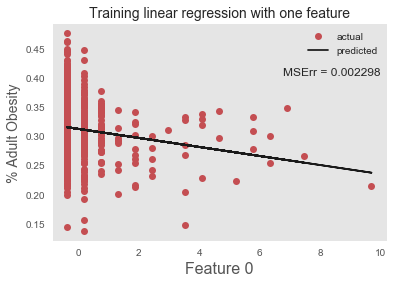

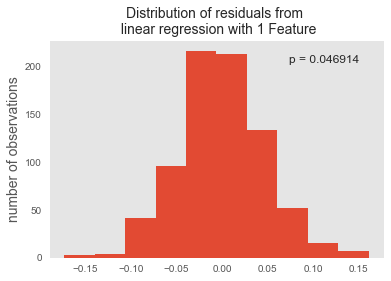

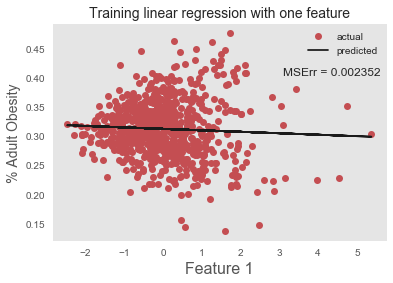

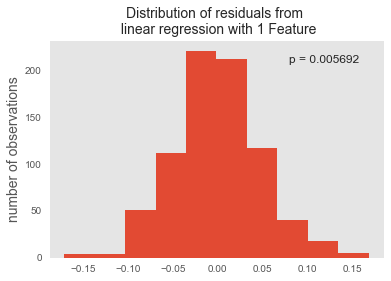

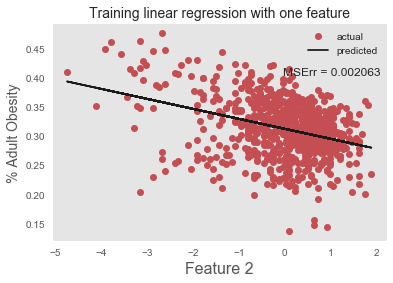

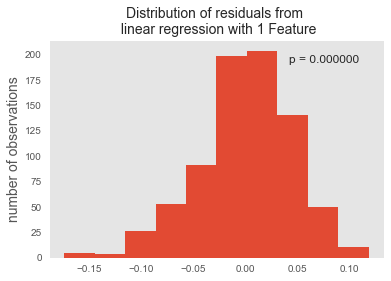

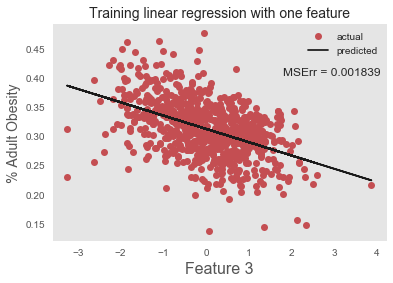

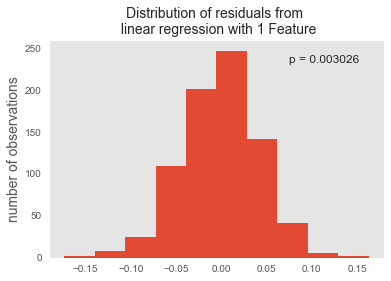

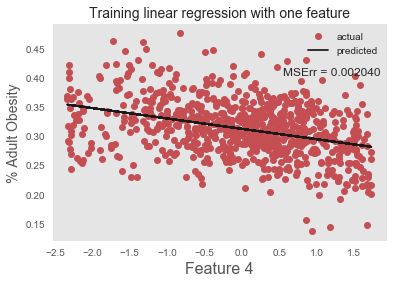

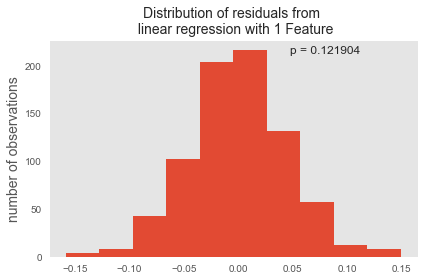

In [34]:
# call function that runs linear model for each feature against targets (training set only)
one_feature_lr(5,X_train,y_train)

In [35]:
#fit a dummy regressor to see if my model can do better than that
dr = DummyRegressor(strategy='mean')
dr.fit(X_train,y_train)
MSEdr = mean_squared_error(y_train,dr.predict(X_train))

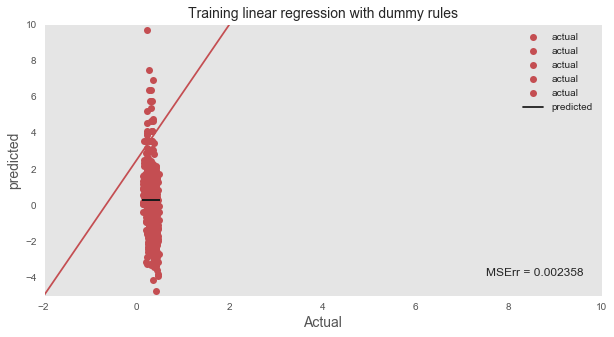

In [37]:
fig3 = plt.figure(figsize=(10,5));
plt.plot(y_train, X_train,'ro', label = 'actual')
plt.plot(y_train,dr.predict(X_train),'k', label='predicted')
plt.plot([-2,2],[-5,10],'r-')
axes = plt.gca()
axes.set_ylim([-5,10])
axes.set_xlim([-2,4])
plt.title('Training linear regression with dummy rules',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.grid();
plt.legend();
fig3.text(0.74, .18, 'MSErr = {:1f}'.format(MSEdr), fontsize=12);

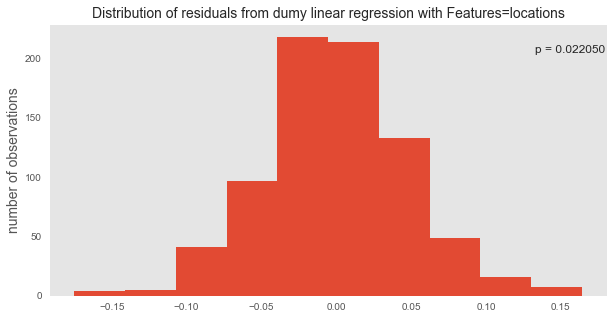

In [38]:
residdr = y_train-dr.predict(X_train)
pdr=normaltest(residdr)


fig1 = plt.figure(figsize=(10,5));
plt.hist(residdr);
plt.title('Distribution of residuals from dumy linear regression with Features=locations',fontsize=14);
plt.ylabel('number of observations',fontsize=14);
fig1.text(0.80, .8, 'p = {:1f}'.format(pdr[1]), fontsize=12);
plt.grid()

# train a linear regression model with 10-fold cross validation 

In [39]:
lr=LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring=make_scorer(mean_squared_error))
print(scores, np.mean(scores))

[ 0.00151052  0.00146322  0.00163949  0.00141281  0.00140292  0.00187812
  0.00201293  0.00206659  0.00162341  0.00190983] 0.00169198499875


In [40]:
y_pr = cross_val_predict(lr, X_train, y_train, cv=10)

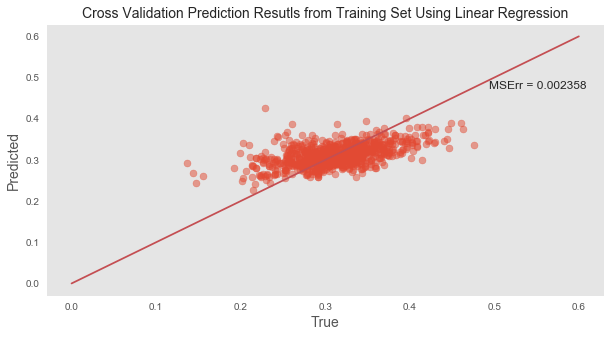

In [43]:
mse = mean_squared_error(y_train, y_pr)

fig4 = plt.figure(figsize=(10,5))
plt.scatter(y_train,y_pr,alpha = .5)
plt.plot([0,.6],[0,.6],'r-')
plt.title('Cross Validation Prediction Resutls from Training Set Using Linear Regression',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.grid();
fig4.text(0.74, .7, 'MSErr = {:2f}'.format(mse), fontsize=12);

# train a lasso regression model using grid search 10-fold cross validation, then apply to test set

In [ ]:
#set up parameters for the model and cross-validation

model = Lasso(max_iter=5000)
parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
grid = GridSearchCV(model,parameters, cv=10, scoring='neg_mean_absolute_error', n_jobs=1);

#fit to model
grid.fit(X_train, y_train)

# calculate error
MSE_L = mean_squared_error(y_train, grid.predict(X_train))

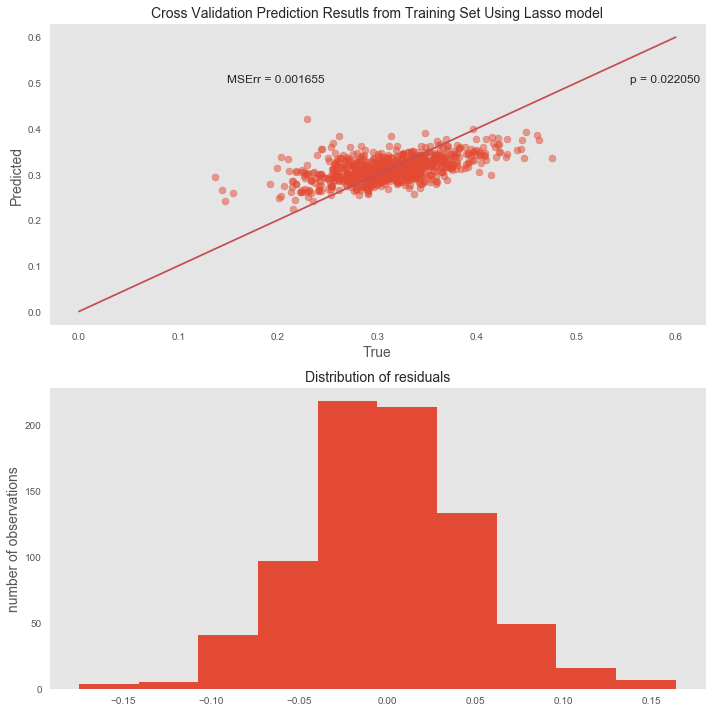

In [48]:
# plot results from the training set 

fig5 = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(y_train,grid.predict(X_train), alpha=.5);
plt.plot([0,.6],[0,.6],'r-')

plt.title('Cross Validation Prediction Resutls from Training Set Using Lasso model',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.grid();
fig5.text(0.32, .88, 'MSErr = {:1f}'.format(MSE_L), fontsize=12);

# plot dist of residuals
plt.subplot(2,1,2)
presiddr = y_train-grid.predict(X_train)
pdr=normaltest(residdr)
plt.hist(residdr);
plt.title('Distribution of residuals',fontsize=14);
plt.ylabel('number of observations',fontsize=14);
fig5.text(0.88, .88, 'p = {:1f}'.format(pdr[1]), fontsize=12);
plt.grid()
plt.tight_layout()

In [49]:
# get the best version of the model 

grid.cv_results_
best_lasso = grid.best_estimator_

# fit the test set
lasso_pred = best_lasso.predict(X_test)

# calc residuals
residuals = []
for true,pred in zip(y_test, lasso_pred):
    residuals.append(true - pred)
   # print("pred,residuals:",str(pred) + "," + str(residuals))

# calc errors
MSE_Lt = mean_squared_error(y_test, grid.predict(X_test))

# pvalue
pdr=normaltest(residuals)

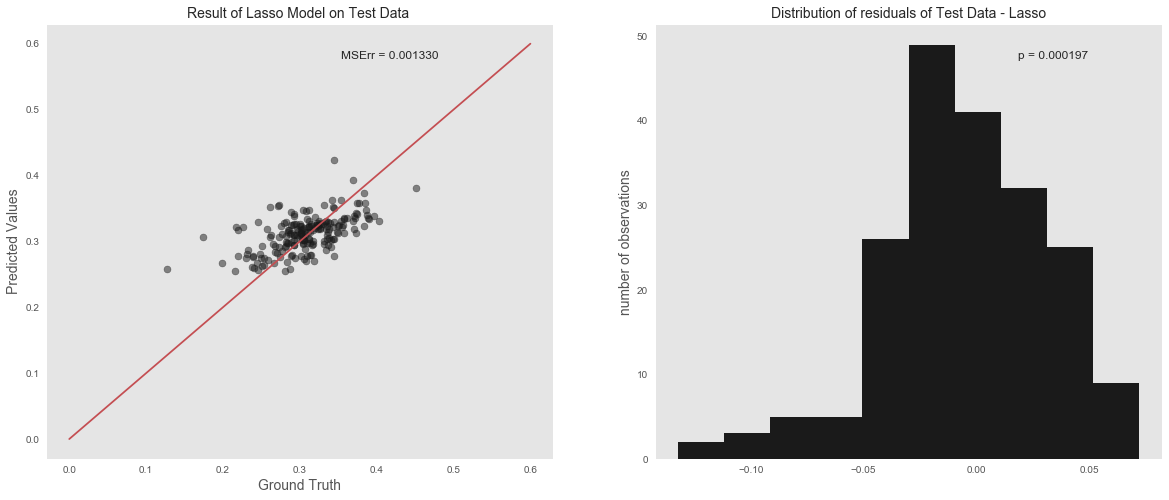

In [53]:

# plot regression results

fig6 = plt.figure(figsize=(20,8));
plt.subplot(1,2,1)
plt.scatter(y_test, best_lasso.predict(X_test),color='k', alpha=.5)
plt.plot([0,.6],[0,.6],'r-')

plt.title('Result of Lasso Model on Test Data ',fontsize=14)
plt.xlabel('Ground Truth',fontsize=14)
plt.ylabel('Predicted Values',fontsize=14)
plt.grid();
fig6.text(0.33, .82, 'MSErr = {:2f}'.format(MSE_Lt), fontsize=12);


#plot residual dist

plt.subplot(1,2,2)
plt.hist(residuals,color='k');
plt.title('Distribution of residuals of Test Data - Lasso',fontsize=14);
plt.ylabel('number of observations',fontsize=14);
fig6.text(0.80, .82, 'p = {:2f}'.format(pdr[1]), fontsize=12);
plt.grid()

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


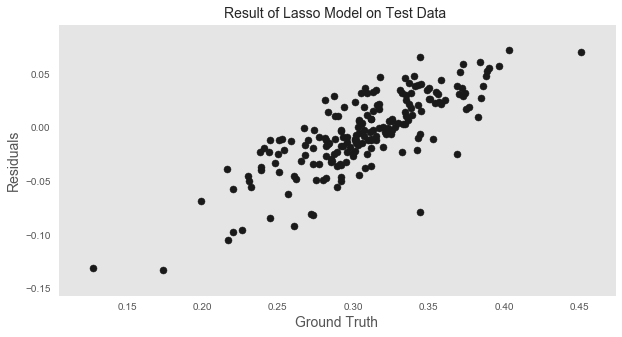

In [54]:
# another view of residuals

fig6 = plt.figure(figsize=(10,5));

plt.scatter(y_test,residuals,color='k')
plt.title('Result of Lasso Model on Test Data ',fontsize=14)
plt.xlabel('Ground Truth',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.grid();